In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# для расчета точности
from sklearn.metrics import accuracy_score
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#  для иерархичекой кластеризации
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

Домашнее задание к лекции «Задачи классификации и кластеризации»

Задание.

    Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
    Оставьте два признака -sepal_length и sepal_width и целевую переменную - variety
    Разделите данные на выборку для обучения и тестирования
    Постройте модель LDA
    Визуализируйте предсказания для тестовой выборки и центры классов
    Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
    Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию



In [164]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [165]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df_variety = iris.target
df_mini = df[['sepal length (cm)', 'sepal width (cm)']]
# print(len(df_mini))
# print(len(df_variety))

In [166]:
X_train, X_test,Y_train, Y_test = train_test_split(df_mini, df_variety, test_size= 0.25,random_state=23) 
X_train.shape, X_test.shape

((112, 2), (38, 2))

In [167]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
# LinearDiscriminantAnalysis()

LinearDiscriminantAnalysis()

In [168]:
lda.predict(X_test)
# LinearDiscriminantAnalysis()

array([2, 2, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1])

In [169]:
res = pd.DataFrame([Y_test, lda.predict(X_test)]) #.T
res

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,2,2,1,0,2,1,0,2,0,1,...,1,1,0,1,0,2,0,0,1,1
1,2,2,1,0,1,2,0,2,0,1,...,2,1,0,1,0,2,0,0,2,1


In [170]:
accuracy_score(Y_test, lda.predict(X_test))

0.8421052631578947

In [171]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-5.91965662,  7.27314341],
       [ 1.42245333, -3.14401197],
       [ 3.73827296, -3.19667716]])

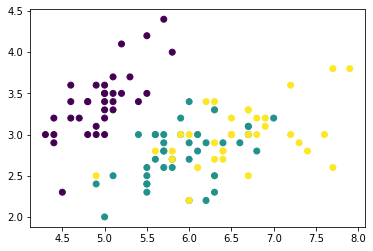

In [172]:
plt.scatter(x=X_train['sepal length (cm)'], y = X_train['sepal width (cm)'], c = Y_train)
plt.show()

In [173]:
lda.means_
lda.means_[:,1]

array([3.39705882, 2.75897436, 2.97692308])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


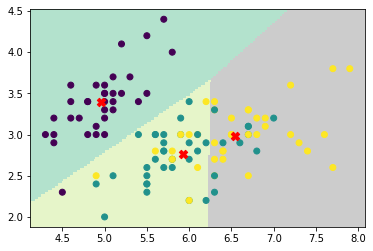

In [174]:
# по тренировочным данным
plt.scatter(x=X_train['sepal length (cm)'], y = X_train['sepal width (cm)'], c = Y_train)
# plt.show()
# центроиды
plt.scatter(lda.means_[:,0], lda.means_[:,1], c = 'r', s = 70, marker='X')
# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))
# предсказываем класс каждой точки нашей сетки
Z = lda.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx,yy,Z, cmap='Pastel2', zorder = -1)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


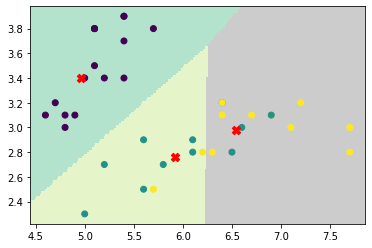

In [175]:
# по тестовым данным:
plt.scatter(x=X_test['sepal length (cm)'], y = X_test['sepal width (cm)'], c = Y_test)
# plt.show()
# центроиды
plt.scatter(lda.means_[:,0], lda.means_[:,1], c = 'r', s = 70, marker='X')
# # делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))
# # предсказываем класс каждой точки нашей сетки
Z = lda.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
# Z = Y_test
plt.pcolormesh(xx,yy,Z, cmap='Pastel2', zorder = -1)
plt.show()

In [176]:
accuracy_score(Y_test, lda.predict(X_test))

0.8421052631578947

In [177]:
accuracy_score(Y_train, lda.predict(X_train))


0.8035714285714286

In [178]:
accuracy_score(df_variety,lda.predict(df_mini))



0.8133333333333334

In [179]:
df_mini.corr()

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию *Курсив*

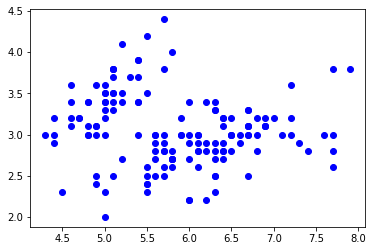

In [185]:
df_mini['sepal length (cm)']
plt.scatter(df_mini['sepal length (cm)'],df_mini['sepal width (cm)'], c = 'b');

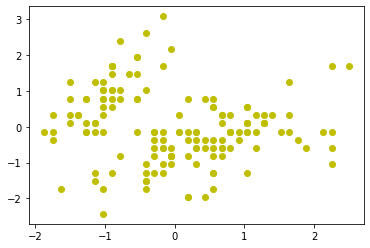

In [186]:
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df_mini)
plt.scatter(df_scaler[:,0],df_scaler[:,1], c = 'y');

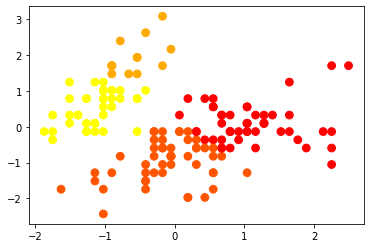

In [189]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=4)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(df_scaler)
plt.scatter(df_scaler[:, 0], df_scaler[:, 1], cmap='autumn', c=clusters, s=60);

In [183]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit_predict(df_scaler)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

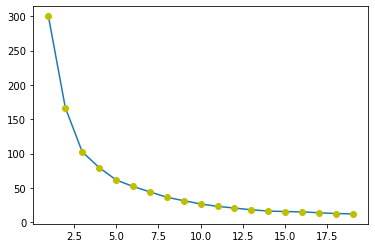

In [184]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'yo');

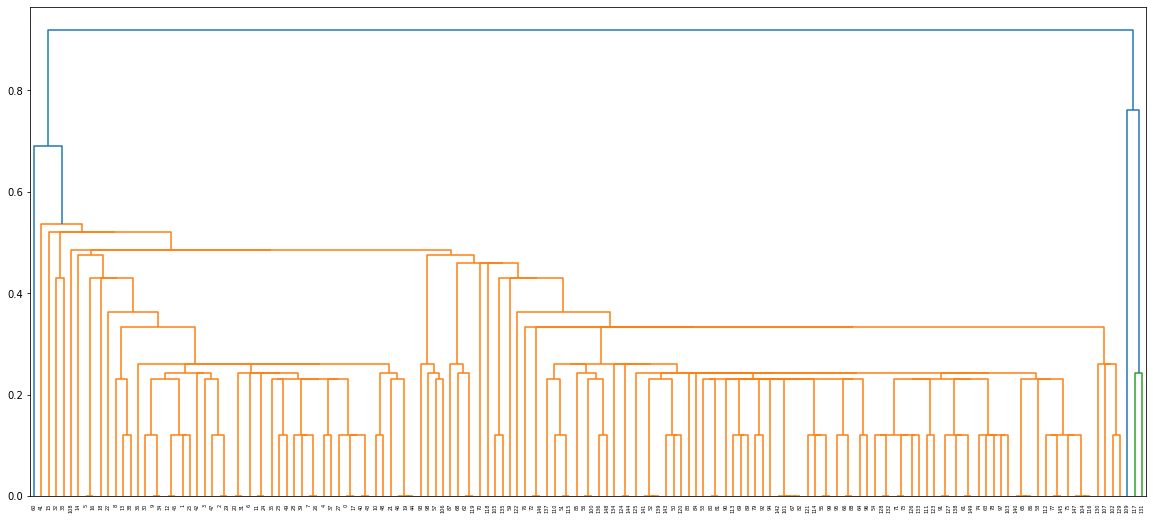

In [188]:
# строим дендрограмму
distance_mat = pdist(df_scaler) # pdist посчитает нам матрицу попарных расстояний между точками
Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма

plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [192]:
aglo = AgglomerativeClustering(n_clusters=4)
clusters = aglo.fit_predict(df_scaler)
clusters

array([1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       3, 1, 3, 1, 3, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

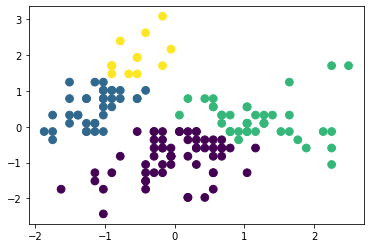

In [193]:
plt.scatter(df_scaler[:, 0], df_scaler[:, 1], c=clusters, s=60);

In [195]:
df_mini['cluster'] = clusters
df_mini

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,0
147,6.5,3.0,2
148,6.2,3.4,2
